# Ion-protein interactions

## Import, functions, and getting the dataset

In [1]:
import glob
import os
import Plotting_functions as fn
import importlib
import matplotlib.pyplot as plt
import re
import numpy as np
from collections import OrderedDict
import seaborn as sns
import pandas as pd

In [2]:
importlib.reload(fn)


<module 'Plotting_functions' from '/Users/quynhnguyen/OneDrive/Documents/research/Quinn_code/Plotting_functions.py'>

In [87]:
def get_count_from_file(file_name):
    count = 0
    with open(file_name) as file:
        for line in file.readlines():
            num_interactions = int(line.rstrip().split()[1])
            if num_interactions > 0:
                count = count+1
    return count

In [8]:
def find_file_for_a_pair(prot, ion, directory):
    for file in glob.glob(directory + "*.dat"):
        if prot in file and ion in file:
            return file

In [9]:
#Testing the function
find_file_for_a_pair('7GLU','115CAL',"/Users/quynhnguyen/kollman/bclx/bclxL_Unprot_1_2_CLPC_50mM_CaCl2/analysis/Ca_protein_lipid_contact/") 

'/Users/quynhnguyen/kollman/bclx/bclxL_Unprot_1_2_CLPC_50mM_CaCl2/analysis/Ca_protein_lipid_contact/BclxL_Unprot_1_2_CLPC_50mM_CaCl27GLUPROA115CALIONS.dat'

In [89]:
def read_interaction_file(filename):
    interaction_count = []
    with open(filename,'r') as file:
        for line in file:
            the_count = line.rstrip().split(" ")[-1]
            if the_count != '0':
                the_count = '1'
            interaction_count.append(the_count)
    return interaction_count

In [142]:
def plot_Ca(res_Ca_dict):
    colors = ['red','blue','green','orange', 'purple']
    fig = plt.figure(figsize = (15,4))
    axs = fig.subplots(len(res_Ca_dict.items()),1, sharex = True)
    for i, key in enumerate(res_Ca_dict.keys()):
        axs[i].plot(res_Ca_dict[key], color = colors[i], linewidth = 5.0) 

In [144]:
def get_res_Ca_dict(resid, resname):
    Ca_list = ca_protein_interactions.loc[ca_protein_interactions['resid'] == resid]['ions'].tolist()
    res_Ca_dict = {}
    for Ca in Ca_list:
        the_file = find_file_for_a_pair(resid+resname, Ca, working_dir)
        count_along_time = read_interaction_file(the_file)
        res_Ca_dict[Ca] = count_along_time
    return res_Ca_dict
    

In [12]:
def get_dataset(working_dir):
    resid_lst = []
    resname_lst = []
    ion_lst = []
    number_of_interactions_lst = []
    interaction_percent = []
    for file in glob.glob(working_dir + "*IONS.dat"):
        filename = file.split("/")[-1]
        print(filename)
        residue = re.findall('Cl2(.{3,})PROA',filename)[0]
        resid = residue[0:-3]
        resname = residue[-3:len(residue)]
        ion = re.findall('PROA(.{3,})IONS.dat',filename)[0]
        number_of_interactions = get_count_from_file(file)
        resname_lst.append(resname)
        resid_lst.append(int(resid))
        ion_lst.append(ion)
        number_of_interactions_lst.append(int(number_of_interactions))
    data = {'resid':resid_lst, 'resname': resname_lst, 'ions':ion_lst, 'interaction_count':number_of_interactions_lst}
    dataframe = pd.DataFrame(data)
    return dataframe

## Analysis

In [13]:
working_dir = "/Users/quynhnguyen/kollman/bclx/bclxL_Unprot_1_2_CLPC_50mM_CaCl2/analysis/Ca_protein_lipid_contact/"

In [171]:
#ca_protein_interactions = get_dataset(working_dir)
#Pickle the dataframe for faster loading next time
#ca_protein_interactions.to_pickle("Ca_protein_interaction.gzip")

In [118]:
ca_protein_interactions = pd.read_pickle("Ca_protein_interaction.gzip")

In [119]:
ca_protein_interactions['resid'] = ca_protein_interactions['resid'].astype(int)
ca_protein_interactions = ca_protein_interactions.sort_values('resid')
ca_protein_interactions['resid'] = ca_protein_interactions['resid'].astype(str)

In [120]:
ca_protein_interactions['interaction_percent']=ca_protein_interactions['interaction_count']/20834*100

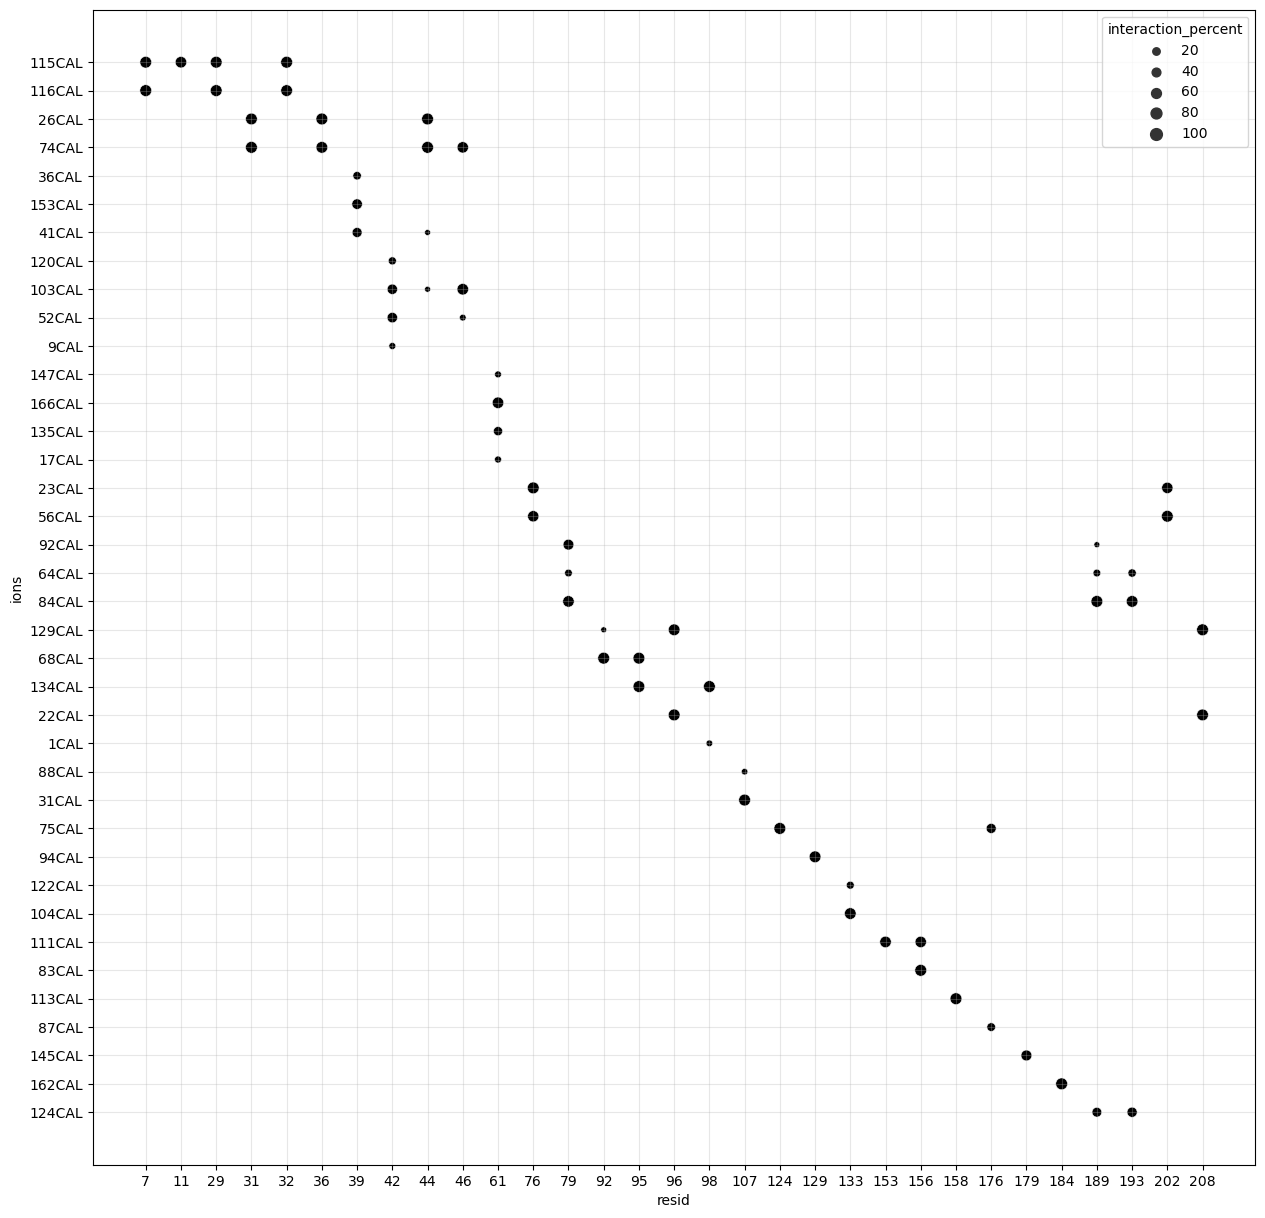

In [121]:
fig = plt.figure(figsize = (15,15))
axs = fig.subplots()
sns.scatterplot(data=ca_protein_interactions, x = 'resid', y = 'ions', size = 'interaction_percent', ax = axs, color='black')
axs.grid(alpha = 0.3)


### Resid 7

In [146]:
resid = '7'
ca_protein_interactions.loc[ca_protein_interactions['resid'] == '7']
resname = 'GLU'

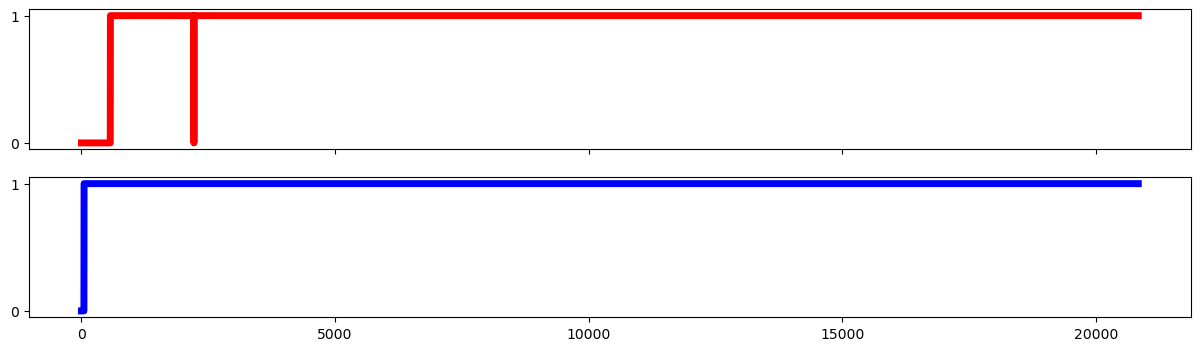

In [147]:
res_Ca_dict = get_res_Ca_dict(resid,resname)
plot_Ca(res_Ca_dict)

### Resid 39


In [152]:
resid = '39'
ca_protein_interactions.loc[ca_protein_interactions['resid'] == '39']


,resid,resname,ions,interaction_count,interaction_percent
57,39,GLU,36CAL,7159,34.362100
55,39,GLU,153CAL,14966,71.834501
17,39,GLU,41CAL,12662,60.775655


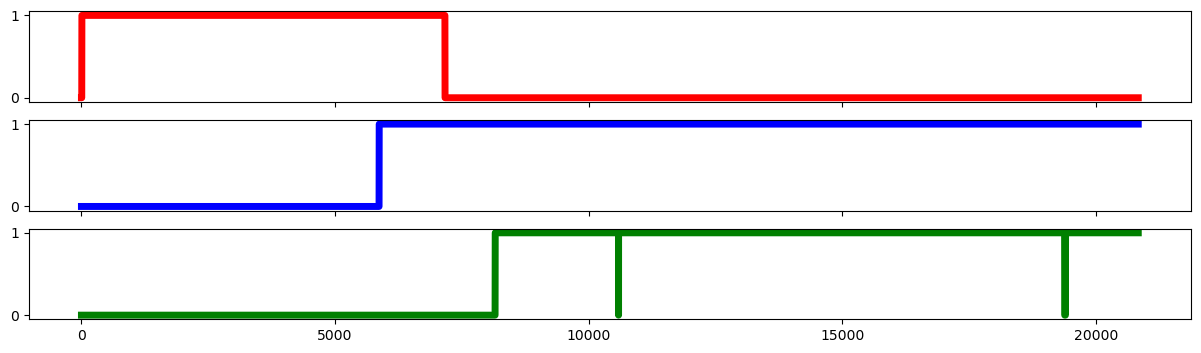

In [151]:
resname = 'GLU'
res_Ca_dict = get_res_Ca_dict(resid,resname)
plot_Ca(res_Ca_dict)

### Resid 42

In [126]:
resid = '42'
ca_protein_interactions.loc[ca_protein_interactions['resid'] == resid]
resname = 'GLU'

,resid,resname,ions,interaction_count,interaction_percent
38,42,GLU,120CAL,5932,28.472689
6,42,GLU,103CAL,14187,68.095421
50,42,GLU,52CAL,14558,69.876164
56,42,GLU,9CAL,2634,12.642795


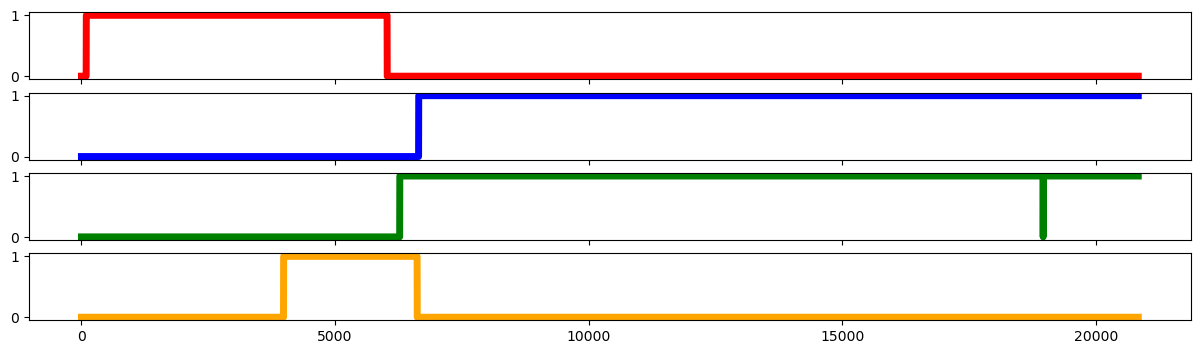

In [145]:
res_Ca_dict = get_res_Ca_dict(resid,resname)
plot_Ca(res_Ca_dict)

### Resid 44

In [154]:
resid = '44'
ca_protein_interactions.loc[ca_protein_interactions['resid'] == resid]

,resid,resname,ions,interaction_count,interaction_percent
10,44,GLU,103CAL,32,0.153595
64,44,GLU,74CAL,20775,99.716809
31,44,GLU,41CAL,34,0.163195
15,44,GLU,26CAL,20571,98.737640


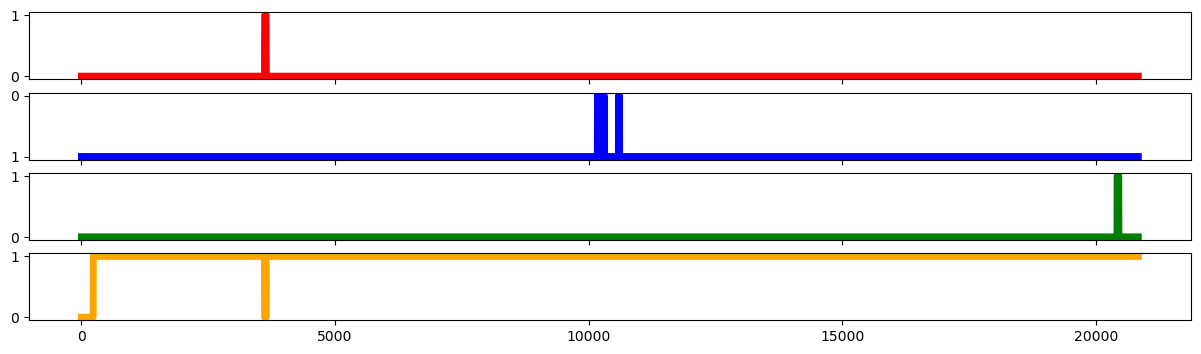

In [155]:
res_Ca_dict = get_res_Ca_dict(resid,resname)
plot_Ca(res_Ca_dict)

### Resid 61

In [159]:
resid = '61'
ca_protein_interactions.loc[ca_protein_interactions['resid'] == '61']

,resid,resname,ions,interaction_count,interaction_percent
52,61,ASP,147CAL,2376,11.404435
0,61,ASP,166CAL,19276,92.521839
13,61,ASP,135CAL,9729,46.697706
21,61,ASP,17CAL,2767,13.281175


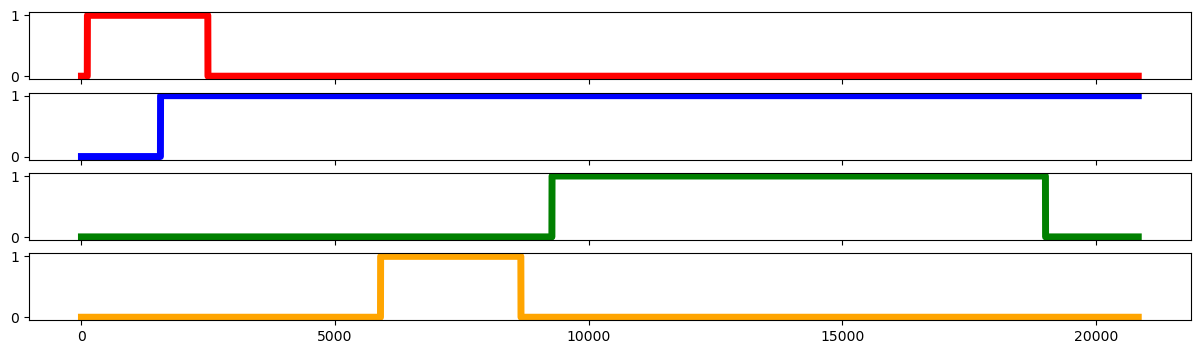

In [160]:
resname = 'ASP'
res_Ca_dict = get_res_Ca_dict(resid,resname)
plot_Ca(res_Ca_dict)

### Resid 79

In [162]:
resid = '79'
ca_protein_interactions.loc[ca_protein_interactions['resid'] == '79']
resname = 'GLU'

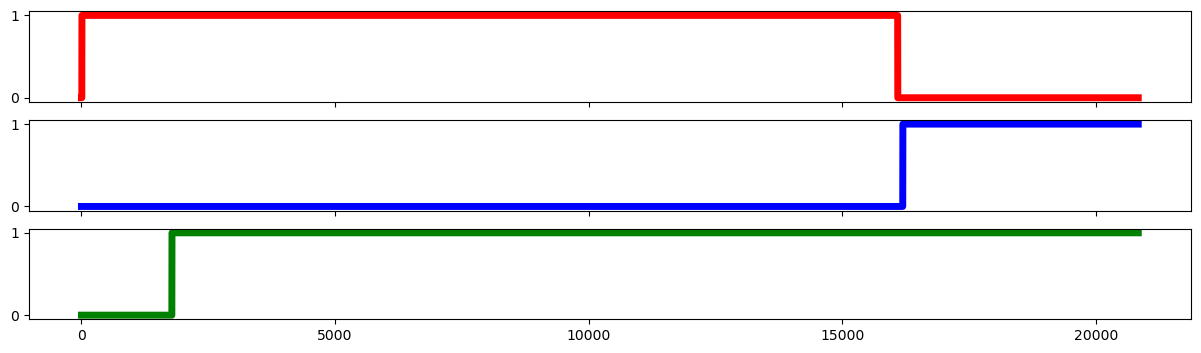

In [163]:
res_Ca_dict = get_res_Ca_dict(resid,resname)
plot_Ca(res_Ca_dict)

### Resid 189

In [167]:
resid = '189'
ca_protein_interactions.loc[ca_protein_interactions['resid'] == '189']

,resid,resname,ions,interaction_count,interaction_percent
11,189,ASP,64CAL,4757,22.832869
48,189,ASP,124CAL,11799,56.633388
59,189,ASP,92CAL,45,0.215993
60,189,ASP,84CAL,20624,98.992032


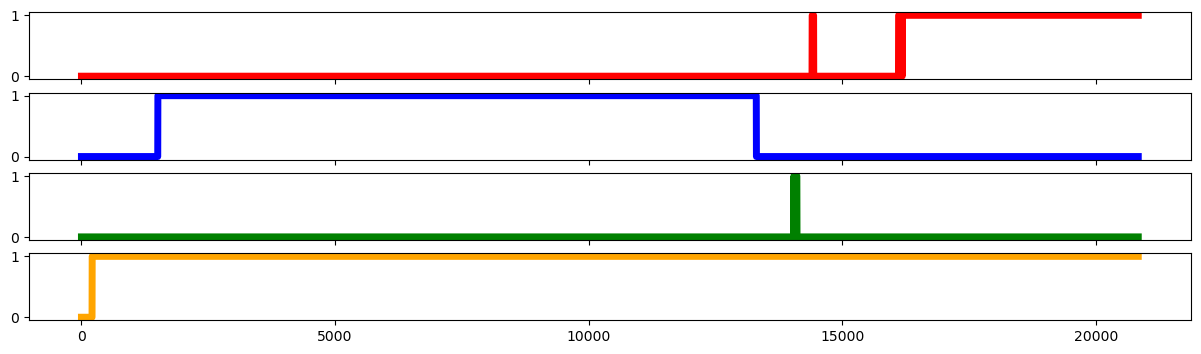

In [168]:
resname = 'ASP'
res_Ca_dict = get_res_Ca_dict(resid,resname)
plot_Ca(res_Ca_dict)

### Conclusions:
The interaction between Ca and protein residues are bivalent or monovalent. There seems to be more dynamic in the loop region. However, within the loop region, nothing seems special about residues that have interaction with more than 2 Ca